Assignment 01– Preprocessing
Diamonds_new Dataset is given
Load the dataset into python environment and do the following
1. Handle the Missing values
2. Outlier Detection
3. Scaling
4. Encoding

# Importing necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset into the python environment
data = pd.read_csv(r"C:\Users\Dell\Downloads\diamonds_new (2).csv")
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


price_new is the dependent variable and the rest are independent variables

In [3]:
data.shape

(53940, 9)

In [4]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [6]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

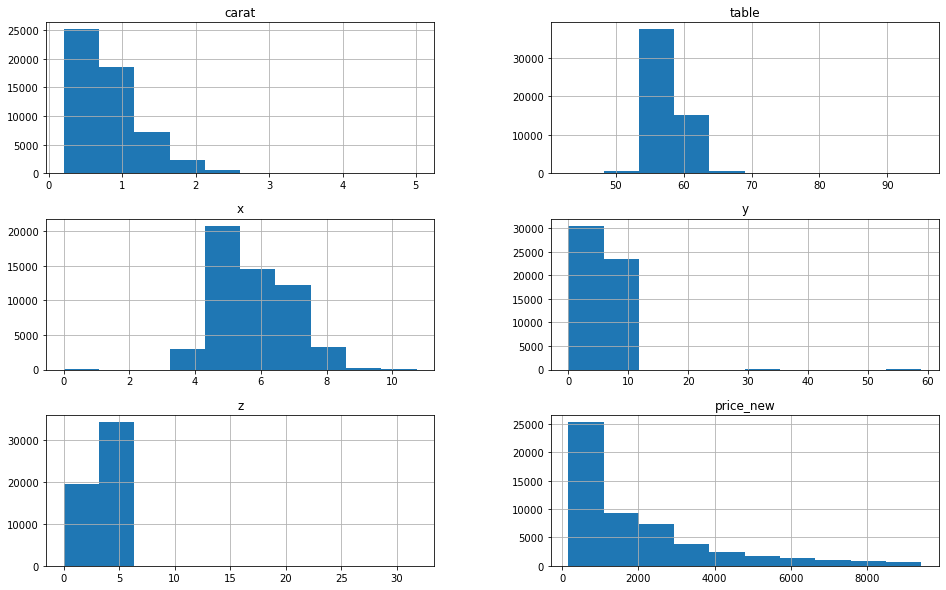

In [8]:
data.hist(figsize=(16,10))
plt.show()

# Handling missing values

In [9]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [10]:
data.isna().sum()/data.shape[0] * 100

carat        0.183537
cut          0.000000
color        0.103819
clarity      0.000000
table        0.116796
x            0.000000
y            0.000000
z            0.000000
price_new    0.000000
dtype: float64

In [11]:
data['carat'] = data['carat'].fillna(data['carat'].median())

In [12]:
data['color'].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [13]:
data['color'] = data['color'].fillna(data['color'].mode()[0])

In [14]:
data['table'] = data['table'].fillna(data['table'].median())

In [15]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# Handling outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


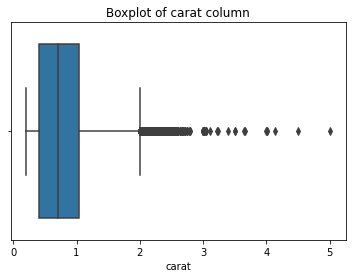

In [23]:
sns.boxplot(data['carat'])
plt.title("Boxplot of carat column")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


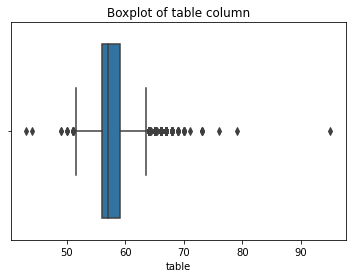

In [24]:
sns.boxplot(data['table']) 
plt.title("Boxplot of table column")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


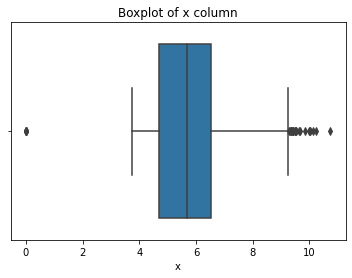

In [25]:
sns.boxplot(data['x'])
plt.title("Boxplot of x column")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


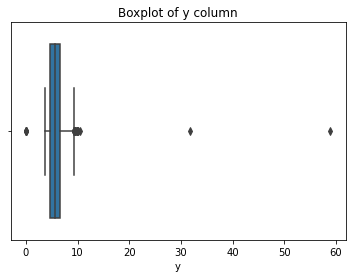

In [26]:
sns.boxplot(data['y'])
plt.title("Boxplot of y column")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


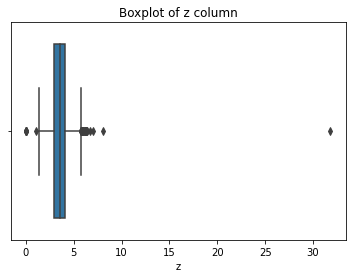

In [27]:
sns.boxplot(data['z'])
plt.title("Boxplot of z column")
plt.show()

# IQR method

In [28]:
Q1=np.percentile(data['carat'],25,interpolation="midpoint")
Q2=np.percentile(data['carat'],50,interpolation="midpoint")
Q3=np.percentile(data['carat'],75,interpolation="midpoint")
print(Q1), print(Q2), print(Q3)

0.4
0.7
1.04


<ipython-input-28-0d3dfc9a341e>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['carat'],25,interpolation="midpoint")
<ipython-input-28-0d3dfc9a341e>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['carat'],50,interpolation="midpoint")
<ipython-input-28-0d3dfc9a341e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.p

(None, None, None)

In [29]:
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
upp_lim=Q3+(1.5*IQR)
print(low_lim)
print(upp_lim)

-0.5599999999999999
2.0


In [30]:
data[data['carat']<low_lim].index

Int64Index([], dtype='int64')

In [32]:
data[data['carat']>upp_lim].index

Int64Index([12246, 13002, 13118, 13757, 13991, 13992, 14138, 14912, 14913,
            15151,
            ...
            27734, 27736, 27737, 27738, 27739, 27741, 27742, 27744, 27746,
            27749],
           dtype='int64', length=1889)

In [33]:
#Since there are too many outliers we will drop outliers greater than carat value 4
outlier_index=np.where(data['carat']>4)
print(outlier_index)

(array([25998, 25999, 27130, 27415, 27630], dtype=int64),)


In [34]:
data.drop([25998, 25999, 27130, 27415, 27630],inplace=True)


# Standard Deviation method

In [35]:
table_sd = np.std(data['table'])
table_sd

2.234372539687515

In [36]:
cut_off = table_sd*3
cut_off

6.703117619062546

In [37]:
table_mean = np.mean(data['table'])
lower,upper = table_mean - cut_off,table_mean + cut_off

In [38]:
data[data['table']<lower].index

Int64Index([3238, 5979, 7418, 11368, 22701, 25179, 35633], dtype='int64')

In [39]:
data.drop([3238, 5979, 7418, 11368, 22701, 25179, 35633],inplace=True)


In [40]:
data[data['table']>upper].index


Int64Index([    2,    91,   227,   296,   314,   356,   359,   526,   712,
              771,
            ...
            52865, 53064, 53154, 53226, 53503, 53542, 53660, 53695, 53697,
            53785],
           dtype='int64', length=329)

In [41]:
data.drop(data[data['table']>upper].index,inplace=True)

# Removing outliers using Scatterplot

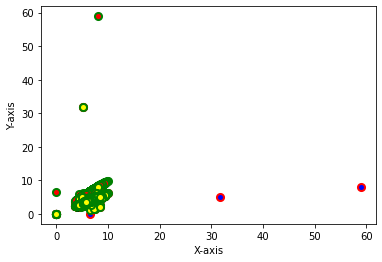

In [42]:
plt.scatter(data['x'],data['y'], c ="red",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
 
plt.scatter(data['y'],data['z'], c ="blue",
            linewidths = 2,
            edgecolor ="red",
            s = 50)

plt.scatter(data['x'],data['z'], c ="yellow",
            linewidths = 2,
            edgecolor ="green",
            s = 50)
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

From the scatterplot we can conclude that the values greater than 30 can be considered as outliers.

In [43]:
data[data['x'] > 30].index


Int64Index([], dtype='int64')

In [44]:
data[data['y'] > 30].index


Int64Index([24067, 49189], dtype='int64')

In [45]:
data[data['z'] > 30].index


Int64Index([48410], dtype='int64')

In [ ]:
data = data.drop([24067,49189,48410])


# Encoding

We have three categorical columns cut, color and clarity to be encoded

In [46]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [47]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [48]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

Here cut and clarity are ordinal features. So for them we can use Label encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['clarity'] = le.fit_transform(data['clarity'])
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,E,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,E,2,61.0,3.89,3.84,2.31,163.0
3,0.29,3,I,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,J,3,58.0,4.34,4.35,2.75,167.5
5,0.24,4,J,7,57.0,3.94,3.96,2.48,168.0


We can use one-hot encoding for the nominal feature color

In [54]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# data['color'] = ohe.fit_transform(data['color'])

In [55]:
data = pd.get_dummies(data)

In [56]:
data.head()

,carat,cut,clarity,table,x,y,z,price_new,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,2,3,55.0,3.95,3.98,2.43,163.0,0,1,0,0,0,0,0
1,0.21,3,2,61.0,3.89,3.84,2.31,163.0,0,1,0,0,0,0,0
3,0.29,3,5,58.0,4.20,4.23,2.63,167.0,0,0,0,0,0,1,0
4,0.31,1,3,58.0,4.34,4.35,2.75,167.5,0,0,0,0,0,0,1
5,0.24,4,7,57.0,3.94,3.96,2.48,168.0,0,0,0,0,0,0,1


# Splitting dataset

In [58]:
x=data.drop('price_new',axis=1)
y=data['price_new']

# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=123)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40199, 14), (40199,), (13400, 14), (13400,))

# Scaling

In [59]:
# using MinMax Scalar (x - min)/ (max- min)

# Import the class MinMaxScaler                                
from sklearn.preprocessing import MinMaxScaler
# Create an instance of the class
scaler = MinMaxScaler()
# Use the fit transform method to perform the transformation on train data
x_train.loc[:,:] = scaler.fit_transform(x_train)
## Use the fit transform method to perform the transformation on test data
x_test.loc[:,:] = scaler.transform(x_test)

In [60]:
x_train

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
26363,0.034582,0.75,0.714286,0.615385,0.447262,0.075382,0.083019,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21133,0.328530,0.75,0.714286,0.615385,0.717039,0.119525,0.134591,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24284,0.374640,1.00,0.714286,0.538462,0.734280,0.123769,0.139937,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47526,0.092219,0.75,0.714286,0.538462,0.527383,0.087436,0.100629,1.0,0.0,0.0,0.0,0.0,0.0,0.0
43663,0.086455,0.50,0.714286,0.461538,0.513185,0.086757,0.100314,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,0.230548,1.00,0.714286,0.615385,0.640974,0.108319,0.125157,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17857,0.325648,0.75,0.285714,0.769231,0.715010,0.119185,0.135220,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28222,0.037464,0.50,0.714286,0.384615,0.447262,0.075552,0.086792,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15842,0.337176,0.75,0.714286,0.615385,0.732252,0.121732,0.137736,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
x_test

,carat,cut,clarity,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
50528,0.158501,0.75,0.428571,0.538462,0.596349,0.100340,0.112893,0.0,0.0,1.0,0.0,0.0,0.0,0.0
43736,0.089337,1.00,0.714286,0.538462,0.516227,0.086927,0.100629,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35893,0.034582,0.50,0.142857,0.307692,0.448276,0.075552,0.086164,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8392,0.086455,0.00,0.000000,0.307692,0.495943,0.081494,0.106289,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32979,0.048991,1.00,0.714286,0.615385,0.462475,0.077929,0.089623,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48107,0.086455,0.50,1.000000,0.307692,0.522312,0.087097,0.097799,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6764,0.233429,0.00,0.285714,0.615385,0.630832,0.104924,0.127987,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27068,0.446686,0.75,0.571429,0.692308,0.801217,0.131749,0.146855,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6588,0.221902,0.50,0.428571,0.384615,0.636917,0.107470,0.123585,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
y_train

26363     322.5
21133    4646.5
24284    6263.0
47526     934.0
43663     718.0
          ...  
15493    3104.0
17857    3602.0
28222     333.0
15842    3168.5
53067    1304.0
Name: price_new, Length: 40199, dtype: float64

In [63]:
y_test

50528    1137.0
43736     719.0
35893     459.0
8392      292.0
32979     405.5
          ...  
48107     967.5
6764     2053.0
27068    8595.5
6588     2039.0
45068     821.5
Name: price_new, Length: 13400, dtype: float64